In [115]:
import sys
import os
import pandas as pd

# Add the project root to the Python path
sys.path.append(os.path.join(os.getcwd(), '..'))

# Import the project modules
from src.config import setup_logging
from src.extract import fetch_statsbomb_event_data
from src.transform import transform_to_shot_events, transform_to_box_entry_events, transform_to_box_entry_clusters
from src.stats import calculate_shots_stats
from src.viz import create_box_entry_plots

# Reload modules when code is changed (uncomment for development)
%load_ext autoreload
%autoreload 2

# Init logging
logger = setup_logging(log_file="../logs/chance_creation.log")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:
events = fetch_statsbomb_event_data()
list(events.columns)

2025-10-04 22:18:40,206 - src.extract.statsbomb_data - INFO - Fetching StatsBomb event data for Europe - UEFA Euro - 2024 - male
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: No

['50_50',
 'bad_behaviour_card',
 'ball_receipt_outcome',
 'ball_recovery_offensive',
 'ball_recovery_recovery_failure',
 'block_deflection',
 'block_offensive',
 'block_save_block',
 'carry_end_location',
 'clearance_aerial_won',
 'clearance_body_part',
 'clearance_head',
 'clearance_left_foot',
 'clearance_other',
 'clearance_right_foot',
 'counterpress',
 'dribble_no_touch',
 'dribble_nutmeg',
 'dribble_outcome',
 'dribble_overrun',
 'duel_outcome',
 'duel_type',
 'duration',
 'foul_committed_advantage',
 'foul_committed_card',
 'foul_committed_offensive',
 'foul_committed_penalty',
 'foul_committed_type',
 'foul_won_advantage',
 'foul_won_defensive',
 'foul_won_penalty',
 'goalkeeper_body_part',
 'goalkeeper_end_location',
 'goalkeeper_outcome',
 'goalkeeper_penalty_saved_to_post',
 'goalkeeper_position',
 'goalkeeper_punched_out',
 'goalkeeper_shot_saved_off_target',
 'goalkeeper_shot_saved_to_post',
 'goalkeeper_success_in_play',
 'goalkeeper_technique',
 'goalkeeper_type',
 'id'

In [117]:
shots = transform_to_shot_events(events)
shots.info()

2025-10-04 22:18:58,544 - src.transform.shot_events - INFO - Transforming 187858 records from events data to shot events.
2025-10-04 22:19:00,304 - src.transform.shot_events - INFO - Transformed 1304 records from events data to shot events.
2025-10-04 22:19:00,306 - src.transform.shot_events - INFO - Shots from set piece: 696
2025-10-04 22:19:00,310 - src.transform.shot_events - INFO - Shots from open play: 608


<class 'pandas.core.frame.DataFrame'>
Index: 1304 entries, 184643 to 185982
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_id               1304 non-null   int64  
 1   team                   1304 non-null   object 
 2   player                 1304 non-null   object 
 3   location               1304 non-null   object 
 4   timestamp              1304 non-null   object 
 5   possession             1304 non-null   int64  
 6   type                   1304 non-null   object 
 7   play_pattern           1304 non-null   object 
 8   shot_from_set_piece    1304 non-null   bool   
 9   shot_type              1304 non-null   object 
 10  shot_aerial_won        133 non-null    object 
 11  shot_body_part         1304 non-null   object 
 12  shot_end_location      1304 non-null   object 
 13  shot_first_time        380 non-null    object 
 14  shot_follows_dribble   1 non-null      object 
 15  sh

In [118]:
shots.head()

,match_id,team,player,location,timestamp,possession,type,play_pattern,shot_from_set_piece,shot_type,...,shot_end_location,shot_first_time,shot_follows_dribble,shot_one_on_one,shot_outcome,shot_redirect,shot_saved_off_target,shot_saved_to_post,shot_statsbomb_xg,shot_technique
184643,3942819,Netherlands,Xavi Simons,"[99.6, 51.2]",00:06:41.445,11,Shot,Regular Play,False,Open Play,...,"[120.0, 37.4, 2.0]",NaN,NaN,NaN,Goal,NaN,NaN,NaN,0.048935,Normal
184644,3942819,England,Harry Kane,"[88.2, 36.6]",00:12:39.772,17,Shot,Regular Play,False,Open Play,...,"[118.3, 37.6, 0.3]",NaN,NaN,NaN,Saved,NaN,NaN,NaN,0.028932,Normal
184645,3942819,England,Bukayo Saka,"[104.5, 41.6]",00:13:41.900,18,Shot,From Throw In,True,Open Play,...,"[106.2, 41.7]",NaN,NaN,NaN,Blocked,NaN,NaN,NaN,0.071750,Normal
184647,3942819,England,Phil Foden,"[117.0, 47.6]",00:22:28.596,27,Shot,Regular Play,False,Open Play,...,"[117.7, 46.1, 0.3]",NaN,NaN,NaN,Saved,NaN,NaN,NaN,0.188995,Normal
184648,3942819,Netherlands,Donyell Malen,"[102.9, 45.1]",00:28:15.003,34,Shot,From Counter,False,Open Play,...,"[103.8, 44.7]",True,NaN,NaN,Blocked,NaN,NaN,NaN,0.039829,Normal


In [119]:
shot_stats = calculate_shots_stats(shots)
shot_stats.sort_values(by="xg_from_open_play_percentage", ascending=False).head(30)

2025-10-04 22:19:00,436 - src.stats.shots - INFO - Calculating statistics for shots.


,team,shots_from_set_piece,shots_from_open_play,shots_from_set_piece_percentage,shots_from_open_play_percentage,xg_from_set_piece,xg_from_open_play,xg_from_set_piece_percentage,xg_from_open_play_percentage
18,Albania,13,19,40.625000,59.375000,0.741814,1.441797,33.971892,66.028108
10,Belgium,23,30,43.396226,56.603774,1.689495,2.688633,38.589442,61.410558
8,Switzerland,28,30,48.275862,51.724138,2.133800,3.215971,39.885820,60.114180
3,France,52,43,54.736842,45.263158,3.020992,4.390092,40.763162,59.236838
2,Spain,54,69,43.902439,56.097561,4.624068,5.950402,43.728606,56.271394
13,Romania,14,23,37.837838,62.162162,1.396654,1.576574,46.974327,53.025673
4,Turkey,33,39,45.833333,54.166667,3.164177,3.300446,48.946034,51.053966
15,Georgia,13,15,46.428571,53.571429,1.309390,1.340671,49.409791,50.590209
6,Austria,27,22,55.102041,44.897959,2.654941,2.677372,49.789673,50.210327
9,Germany,46,47,49.462366,50.537634,3.602855,3.555846,50.328337,49.671663


In [120]:
box_entries = transform_to_box_entry_events(events)
box_entries.info()

2025-10-04 22:19:00,510 - src.transform.box_entry_events - INFO - Transforming 187858 records from events data to box entry events.
2025-10-04 22:19:01,355 - src.transform.box_entry_events - INFO - Found 98029 passes and carries.
2025-10-04 22:19:01,972 - src.transform.box_entry_events - INFO - Found 3164 box entry events.
2025-10-04 22:19:06,639 - src.transform.box_entry_events - INFO - Box entry events from set piece: 1850
2025-10-04 22:19:06,643 - src.transform.box_entry_events - INFO - Box entry events from open play: 1314


<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 388 to 149876
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1314 non-null   object 
 1   match_id                  1314 non-null   int64  
 2   team                      1314 non-null   object 
 3   player                    1314 non-null   object 
 4   location                  1314 non-null   object 
 5   timestamp                 1314 non-null   object 
 6   possession                1314 non-null   int64  
 7   type                      1314 non-null   object 
 8   x                         1314 non-null   float64
 9   y                         1314 non-null   float64
 10  end_x                     1314 non-null   float64
 11  end_y                     1314 non-null   float64
 12  box_entry_from_set_piece  1314 non-null   bool   
dtypes: bool(1), float64(4), int64(2), object(6)
memory usage: 134.7+

In [121]:
box_entries["team"].value_counts()

team
Spain             128
Portugal          106
France             94
Germany            93
England            84
Austria            73
Netherlands        72
Turkey             69
Switzerland        66
Belgium            66
Ukraine            49
Denmark            47
Italy              44
Croatia            42
Serbia             40
Czech Republic     35
Slovenia           34
Slovakia           32
Romania            30
Georgia            27
Albania            22
Hungary            22
Poland             22
Scotland           17
Name: count, dtype: int64

In [122]:
spain_entries = box_entries[box_entries["team"] == "Spain"]
spain_entries

,id,match_id,team,player,location,timestamp,possession,type,x,y,end_x,end_y,box_entry_from_set_piece
1450,1f900d7c-eb9a-4130-8368-7ec4c4fd98aa,3943043,Spain,Daniel Olmo Carvajal,"[91.4, 68.5]",00:04:09.653,9,Pass,91.4,68.5,111.6,39.3,False
1451,3d00c9d5-56c4-4ef5-a13c-5d7f153c2b23,3943043,Spain,Nicholas Williams Arthuer,"[100.7, 10.4]",00:04:17.515,9,Pass,100.7,10.4,111.5,35.3,False
1495,160b3db9-713e-44e4-ac92-470a7f852271,3943043,Spain,Nicholas Williams Arthuer,"[97.7, 10.6]",00:07:07.898,12,Pass,97.7,10.6,106.5,21.2,False
1499,d9f5651f-0e12-40fc-b26e-5bfaf925552f,3943043,Spain,Daniel Olmo Carvajal,"[100.7, 30.5]",00:07:12.121,12,Pass,100.7,30.5,104.7,26.7,False
1554,877b6bed-f897-4121-b50e-4dce5918b84b,3943043,Spain,Nicholas Williams Arthuer,"[106.7, 11.3]",00:13:51.147,24,Pass,106.7,11.3,107.7,37.7,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147763,5f87ef1c-b64a-41b1-9691-0280054ac2c6,3930160,Spain,Pedro González López,"[100.2, 43.1]",00:11:41.482,19,Carry,100.2,43.1,103.7,47.7,False
147794,384ca0c9-dcf5-4583-83bc-da905a58d28b,3930160,Spain,Lamine Yamal Nasraoui Ebana,"[90.6, 55.9]",00:14:10.468,24,Carry,90.6,55.9,106.5,49.9,False
147914,cb80ad27-a865-460d-b0ae-42a650c46883,3930160,Spain,Álvaro Borja Morata Martín,"[91.0, 37.7]",00:28:06.651,49,Carry,91.0,37.7,104.1,39.9,False
148033,3300195b-3611-4039-a4b9-259c4ca4ea3b,3930160,Spain,Nicholas Williams Arthuer,"[93.2, 50.8]",00:46:18.546,78,Carry,93.2,50.8,116.6,58.8,False


In [123]:
spain_passes = spain_entries[spain_entries["type"] == "Pass"]
spain_passes_clusters = transform_to_box_entry_clusters(spain_passes)
spain_passes_clusters

2025-10-04 22:19:06,951 - src.transform.box_entry_clusters - INFO - Transforming 90 records from box entry events data to box entry clusters.
2025-10-04 22:19:06,977 - src.transform.box_entry_clusters - INFO - Transformed box entries into 5 clusters.


,cluster,x,y,end_x,end_y,id
0,0,93.500000,14.617647,109.747059,34.252941,17
1,1,103.383333,69.644444,109.366667,50.644444,18
2,2,97.064706,35.605882,107.229412,35.876471,17
3,3,111.157895,8.963158,111.936842,35.068421,19
4,4,87.705263,51.647368,107.710526,47.152632,19


In [124]:
spain_carries = spain_entries[spain_entries["type"] == "Carry"]
spain_carries_clusters = transform_to_box_entry_clusters(spain_carries)
spain_carries_clusters

2025-10-04 22:19:07,088 - src.transform.box_entry_clusters - INFO - Transforming 38 records from box entry events data to box entry clusters.
2025-10-04 22:19:07,098 - src.transform.box_entry_clusters - INFO - Transformed box entries into 5 clusters.


,cluster,x,y,end_x,end_y,id
0,0,98.712500,38.512500,103.012500,37.575000,8
1,1,96.916667,73.216667,112.183333,58.983333,6
2,2,96.453846,15.561538,108.707692,25.069231,13
3,3,80.500000,68.966667,108.033333,55.433333,3
4,4,97.775000,55.600000,106.975000,53.512500,8


2025-10-04 22:19:13,084 - src.transform.box_entry_clusters - INFO - Transforming 38 records from box entry events data to box entry clusters.
2025-10-04 22:19:13,095 - src.transform.box_entry_clusters - INFO - Transformed box entries into 5 clusters.
2025-10-04 22:19:13,096 - src.transform.box_entry_clusters - INFO - Transforming 90 records from box entry events data to box entry clusters.
2025-10-04 22:19:13,109 - src.transform.box_entry_clusters - INFO - Transformed box entries into 5 clusters.
2025-10-04 22:19:13,110 - src.viz.box_entries - INFO - Creating box entry plots for Spain.
2025-10-04 22:19:13,111 - src.viz.box_entries - INFO - Box entry carries: 38
2025-10-04 22:19:13,113 - src.viz.box_entries - INFO - Box entry passes: 90
2025-10-04 22:19:13,116 - src.viz.box_entries - INFO - Box entry carries clusters: 5
2025-10-04 22:19:13,117 - src.viz.box_entries - INFO - Box entry passes clusters: 5


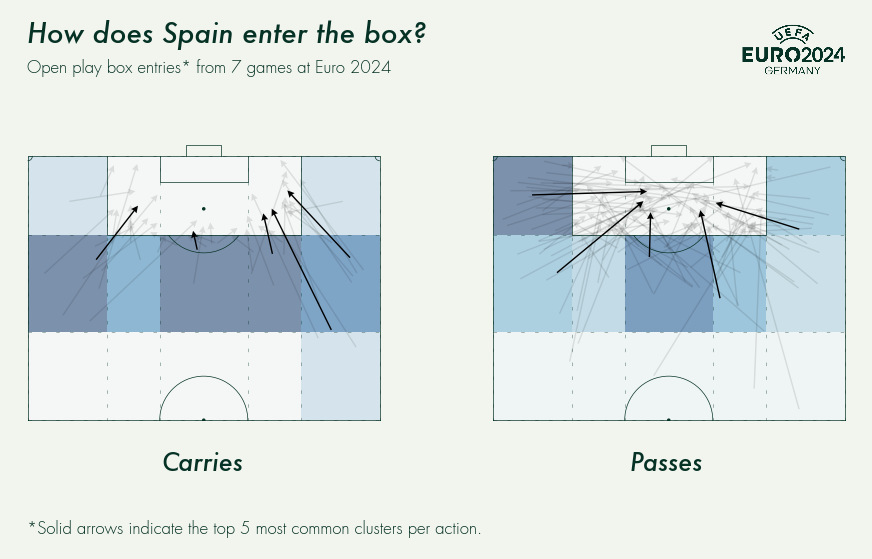

In [126]:
fig = create_box_entry_plots("Spain", spain_entries)